In [1]:
import os
os.chdir('..')

from util import CONFIG
CONFIG.set_use_mpl_tables(True)

### Chapter 6 examples with Qiskit

In this notebook, we run the example circuits from chapter 6 using the Qiskit simulator backend __[`statevector_simulator`](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.StatevectorSimulator.html)__.

As in the previous chapter examples, we will add the `run` function below to the Qiskit `QuantumCircuit` class to run circuits on the Qiskit statevector simulator.

In this chapter we will also use the `QFT` circuit from the Qiskit circuit library to create `qft` and `iqft` class attributes.

In [2]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, transpile

def run(self):
    backend = qiskit.Aer.get_backend('statevector_simulator')
    circ = transpile(self, backend)
    job = backend.run(circ)
    state = job.result().get_statevector()
    return state

setattr(QuantumCircuit, 'run', run)

In [3]:
from qiskit.circuit.library import QFT

def qft(self, targets, swap=True):
        self.append(QFT(num_qubits=len(targets), inverse=False, do_swaps=swap), targets)

setattr(QuantumCircuit, 'qft', qft)

def iqft(self, targets, swap=True):
        self.append(QFT(num_qubits=len(targets), inverse=True, do_swaps=swap), targets)

setattr(QuantumCircuit, 'iqft', iqft)

def report(self, name):
    pass

setattr(QuantumCircuit, 'report', report)

## Section 6.2

Circuit for encoding a frequency `v` in a quantum state (listing 6.2):

In [4]:
from math import pi

def encode_frequency(n, v):
    q = QuantumRegister(n)
    qc = QuantumCircuit(q)

    for j in range(n):
        qc.h(q[j])

    for j in range(n):
        qc.p(2 * pi / 2 ** (n - j) * v, q[j])

    qc.iqft(range(n))

    return qc

In [5]:
n = 3
v = 4.3
qc = encode_frequency(n, v)
state = qc.run()

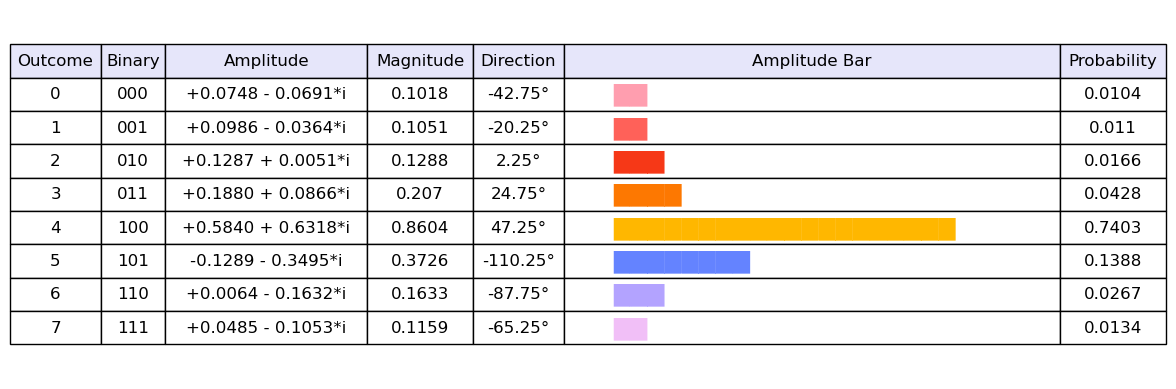

In [6]:
from util import show_state_table

show_state_table(state)

## Section 6.4

Function to create circuit for encoding the raised cosien distribution in a quantum state (listing 6.5):

In [7]:
def raised_cosine(n, mu):
    N = 2 ** n
    assert (0 <= mu < 2 ** n)

    q = QuantumRegister(n)
    qc = QuantumCircuit(q)

    qc.h(q[n - 1])
    qc.p(-pi * mu / N * 2, q[n - 1])

    qc.qft(q[::-1], False)

    return qc

In [8]:
qc = raised_cosine(3, 3.25)
state = qc.run()

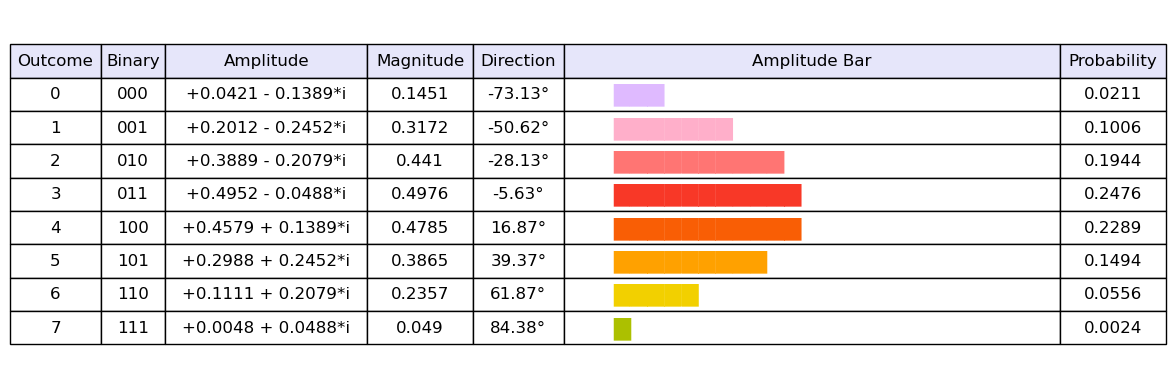

In [9]:
show_state_table(state)

Function for creating the circuit for encoding the $\sin^4$ probability distribution in a quantum state (listing 6.6):

In [10]:
from math import acos, sqrt

def sin_4(n):
    theta = acos(sqrt(2 / 3))
    q = QuantumRegister(n)
    qc = QuantumCircuit(q)

    qc.ry(2 * theta, q[n - 1])
    qc.p(pi, q[n - 1])
    qc.cry(pi / 2, q[n - 1], q[0])

    for i in range(1, n - 1):
        qc.cx(q[0], q[i])

    qc.qft(q[::-1], False)

    return qc

In [11]:
n = 3           
N = 2 ** n      
qc = sin_4(n)   
state = qc.run()

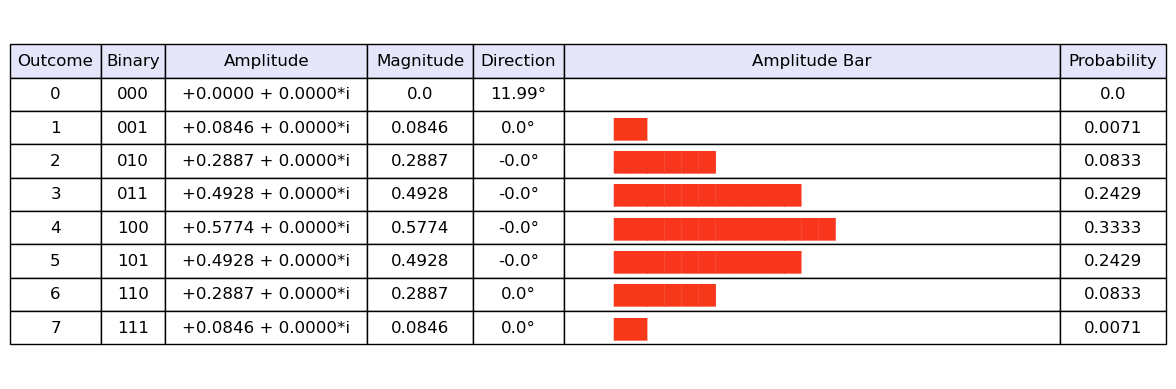

In [12]:
show_state_table(state)